# Introduction 🙌

Hello🥰
We are **IRIS Creative** whose members are:

*   Arkan Syafiq At'taqy
*   Muhammad Razzan Ramadhana
*   Wanda Desi Rahmawati

In this notebook, we're developing predictive models to enhance stores' comprehension of their customers. By doing so, we aim to optimize the effectiveness and efficiency of future promotional initiatives, ultimately leading to a more insightful understanding of customer behavior and preferences🏤🪙

Hope it is useful🙌


---





**About Dataset**

This dataset is collected by stores to help them understand their customers and improve their business strategies. This dataset contains information about customer demographics, shopping behavior, and their interactions with stores. <br>
It can be accessed: [Data](https://www.kaggle.com/competitions/data-analytics-competition-find-it-2024/data)


Further explanation below:

`train_features.csv` - the training set

`test_features.csv` - the test set

Columns

1. **ID**: Nomor identifikasi unik untuk setiap pelanggan.
2. **tahun_kelahiran**: Tahun kelahiran pelanggan.
3. **pendidikan**: Tingkat pendidikan pelanggan (SMP,SMA,Sarjana,Magister,Doktor).
4. **status_pernikahan**: Status pernikahan pelanggan (Sendiri,Rencana Menikah,Menikah,Cerai,Cerai Mati).
5. **pendapatan**: Pendapatan pelanggan dalam rupiah.
6. **jumlah_anak_balita**: Banyaknya anak pelanggan yang masih balita.
7. **jumlah_anak_remaja**: Banyaknya anak pelanggan yang sudah remaja.
8. **terakhir_belanja**: Jumlah hari berlalu setelah terakhir belanja.
9. **belanja_buah**: Biaya yang dikeluarkan untuk belanja buah.
10. **belanja_daging**: Biaya yang dikeluarkan untuk belanja daging.
11. **belanja_ikan**: Biaya yang dikeluarkan untuk belanja ikan.
12. **belanja_kue**: Biaya yang dikeluarkan untuk belanja kue.
13. **pembelian_diskon**: Banyaknya pembelian yang dilakukan saat diskon.
14. **pembelian_web**: Banyaknya pembelian yang dilakukan saat web.
15. **pembelian_toko**: Banyaknya pembelian yang dilakukan saat toko.
16. **keluhan**: 1 - pernah memberikan keluhan, 0 - tidak pernah.
17. **tanggal_menjadi_anggota**: Pertama kali terdaftar sebagai anggota
18. **jumlah_promosi** : (target). Pada promosi ke berapa pelanggan menerima program dari toko, dari total 6 kali promosi yang dilakukan. Nilai 0 berarti tidak menerima sama sekali
19. **usia**: Usia pelanggan berdasarkan tahun kelahiran pelanggan
20. **total_belanja**: Total belanja dari semua kategori produk (buah, daging, ikan, kue) untuk setiap pelanggan.
21. **pengeluaran** : Biaya yang dikeluarkan berdasarkan pendapatan dikurangi total_belanja.
22. **jumlah_anak** : Jumlah anak (balita dan remaja)
23. **kategori_pendapatan** : Kategori berdasarkan pendapatan (Rendah, Menengah Rendah, Menengah, Tinggi, Sangat Tinggi)
24. **pendapatan_per_anak** : Jumlah pendapatan dibagi jumlah anak





# Library

In [ ]:
# Library for Data Manipulation.
import pandas as pd
import numpy as np

# Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)


# pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
# install optuna
%pip install optuna

In [ ]:
# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold, cross_val_predict

#for hypertuning
import optuna
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, roc_curve



# Read Data 📑👀

In [ ]:
# Read data train
df_train = pd.read_csv('train_features.csv')
df_train.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [ ]:
# Read data train labels
df_labels = pd.read_csv('train_labels.csv')
df_labels.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


In [ ]:
# Read data test
df_test = pd.read_csv('test_features.csv')
df_test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [ ]:
# Gabungkan dataframe menggunakan merge
df_train = pd.concat([df_train, df_labels], axis=1)
df_train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0


# Review Dataset 🔎📎📃

## Data Dimension

In [ ]:
print("Train dataset shape: ",df_train.shape)
print("Train labels dataset shape: ",df_labels.shape)
print("Test dataset shape: ",df_test.shape)

Train dataset shape:  (3817, 17)
Train labels dataset shape:  (3817, 1)
Test dataset shape:  (3818, 17)


**What we found?💡**

* Train Dataset:

  Terdapat 3817 baris data (entri) dalam dataset tersebut dan
  ada 16 kolom (fitur) yang menyimpan informasi atau atribut tentang setiap entri dalam train dataset.

* Test Dataset:

  Terdapat 3818 baris data (entri) dalam dataset tersebut dan ada 17 kolom (fitur) yang menyimpan informasi atau atribut tentang setiap entri dalam test dataset.

## Information of Dataset 📪

In [ ]:
# Information of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [ ]:
# Information of train dataset
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   jumlah_promosi  3817 non-null   int64
dtypes: int64(1)
memory usage: 29.9 KB


In [ ]:
# Information of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3614 non-null   object 
 3   status_pernikahan        3636 non-null   object 
 4   pendapatan               3615 non-null   float64
 5   jumlah_anak_balita       3609 non-null   float64
 6   jumlah_anak_remaja       3608 non-null   float64
 7   terakhir_belanja         3617 non-null   float64
 8   belanja_buah             3632 non-null   float64
 9   belanja_daging           3623 non-null   float64
 10  belanja_ikan             3622 non-null   float64
 11  belanja_kue              3631 non-null   float64
 12  pembelian_diskon         3639 non-null   float64
 13  pembelian_web            3638 non-null   float64
 14  pembelian_toko          

## Column

In [ ]:
# Identify the data types of columns
column_data_types = df_train.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in Train dataset")
print(f"There are {categorical_count} Categorical Columns in Train dataset")

There are 14 Numerical Columns in Train dataset
There are 3 Categorical Columns in Train dataset


**Column Grouping📑**

category columns = `['pendidikan','status_pernikahan', 'tanggal_menjadi_anggota']`

binary columns =` ['keluhan']`

numeric columns = `['tahun_kelahiran' ,'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko']`

drop column = `['ID', 'tanggal_menjadi_anggota']`

In [ ]:
# Drop columns 'id' and 'tanggal_menjadi_anggotathat is not important for modelling
id = df_test['ID']
cols = ['ID', 'tanggal_menjadi_anggota']
df_test.drop(columns=cols, inplace=True)

## Descriptive Statistic 📝

In [ ]:
# Desc stat of train dataset numeric cols
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun_kelahiran,3817.0,1.967824e+03,1.176813e+01,1899.0,1959.0,1968.0,1976.0,2000.0
pendapatan,3627.0,1.144832e+08,4.346042e+07,5073000.0,81125122.0,115621394.0,150495956.0,332884000.0
jumlah_anak_balita,3627.0,2.930797e-01,4.730627e-01,0.0,0.0,0.0,1.0,2.0
jumlah_anak_remaja,3613.0,3.537227e-01,4.930139e-01,0.0,0.0,0.0,1.0,2.0
terakhir_belanja,3645.0,4.723155e+01,2.706851e+01,0.0,25.0,47.0,69.0,128.0
belanja_buah,3636.0,5.980424e+04,7.402498e+04,0.0,7907.0,26456.0,86162.0,396508.0
belanja_daging,3639.0,4.385748e+05,5.120427e+05,0.0,49479.5,221993.0,686355.5,3489675.0
belanja_ikan,3624.0,8.142900e+04,9.997623e+04,0.0,10115.0,36054.5,121380.0,621600.0
belanja_kue,3603.0,6.337797e+04,7.943546e+04,0.0,7947.0,27795.0,89502.5,542164.0
pembelian_diskon,3639.0,2.125584e+00,2.100133e+00,0.0,0.0,2.0,3.0,20.0


In [ ]:
# Desc stat of test dataset numeric cols
df_labels.describe().T

,count,mean,std,min,25%,50%,75%,max
jumlah_promosi,3817.0,2.5858,2.101845,0.0,0.0,3.0,4.0,6.0


In [ ]:
# Desc stat of test dataset numeric cols
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun_kelahiran,3818.0,1.967790e+03,1.180857e+01,1892.0,1959.0,1968.0,1.976000e+03,2.009000e+03
pendapatan,3615.0,1.163249e+08,5.105122e+07,2998899.0,81681624.0,117732079.0,1.506877e+08,1.305740e+09
jumlah_anak_balita,3609.0,2.829039e-01,4.650046e-01,0.0,0.0,0.0,1.000000e+00,2.000000e+00
jumlah_anak_remaja,3608.0,3.553215e-01,4.968651e-01,0.0,0.0,0.0,1.000000e+00,2.000000e+00
terakhir_belanja,3617.0,4.718137e+01,2.694029e+01,0.0,25.0,46.0,6.800000e+01,1.330000e+02
belanja_buah,3632.0,6.123408e+04,7.664759e+04,0.0,7497.5,29525.0,8.677675e+04,4.086460e+05
belanja_daging,3623.0,4.528484e+05,5.123206e+05,0.0,54621.0,232753.0,7.217960e+05,3.271191e+06
belanja_ikan,3622.0,8.533861e+04,1.037895e+05,0.0,10115.0,40025.5,1.296568e+05,5.749320e+05
belanja_kue,3631.0,6.380151e+04,7.842854e+04,0.0,8092.0,29251.0,9.140700e+04,5.320490e+05
pembelian_diskon,3639.0,2.101676e+00,2.115571e+00,0.0,0.0,2.0,3.000000e+00,1.700000e+01


In [ ]:
# Desc stat of train dataset cat cols
df_train.describe(include="O").T

,count,unique,top,freq
pendidikan,3628,6,Sarjana,1841
status_pernikahan,3605,6,Rencana Menikah,1271
tanggal_menjadi_anggota,1065,564,2013-05-17,6


In [ ]:
# Check unique values of cat cols
cat_cols = df_train.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df_train[column]))

Unique values of  pendidikan {nan, 'Magister', 'Sarjana', '5', 'Doktor', 'SMP', 'SMA'}
Unique values of  status_pernikahan {'Menikah', 'Sendiri', nan, 'Rencana Menikah', '5', 'Cerai', 'Cerai Mati'}
Unique values of  tanggal_menjadi_anggota {'2012-11-19', '2013-05-13', '2013-03-28', '2013-12-15', '2012-12-22', '2014-06-02', '2013-01-07', '2013-11-08', '2013-05-03', '2013-04-10', '2012-08-12', '2013-05-24', '2013-01-01', '2014-03-28', '2014-06-03', '2013-08-05', '2013-11-02', '2013-09-19', '2014-06-13', '2013-11-21', '2012-10-15', '2013-11-19', '2014-02-18', '2014-03-12', '2013-03-08', '2014-06-26', '2013-06-20', '2013-10-21', '2012-11-09', '2012-12-15', '2012-08-26', '2013-02-23', '2013-03-12', '2013-02-26', '2013-07-28', '2013-07-12', '2012-10-20', '2013-10-10', '2014-01-25', '2013-10-29', '2013-01-09', '2013-11-07', '2013-05-02', '2013-01-10', '2014-05-13', '2013-06-24', '2012-09-28', '2013-10-07', '2013-09-02', '2012-12-02', '2013-12-09', '2013-09-22', '2013-02-20', '2014-06-20', '20

**What we found?💡**

Terdapat noise dan missing value pada kolom `'pendidikan'`dan `'status_pernikahan'`:

* '5'
* nan

## Check Duplicate

In [ ]:
print("Duplicates in Train Dataset: ",df_train.duplicated().sum())

Duplicates in Train Dataset:  0


## Check Missing Value

In [ ]:
print("Checking Null Values in Train Dataset")
missing_data = df_train.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df_train))*100,2)
missing_data

Checking Null Values in Train Dataset


,Total No. of Missing Values,% of Missing Values
tahun_kelahiran,0,0.00
pendidikan,189,4.95
status_pernikahan,212,5.55
pendapatan,190,4.98
jumlah_anak_balita,190,4.98
jumlah_anak_remaja,204,5.34
terakhir_belanja,172,4.51
belanja_buah,181,4.74
belanja_daging,178,4.66
belanja_ikan,193,5.06


**What we found?💡**

Terdapat missing value dalam data

# Handling 🪄


In [ ]:
cols2 = 'tanggal_menjadi_anggota'
df_train.drop(columns=cols2, inplace=True)
df_train_prep = df_train.copy()

In [ ]:
df_test_prep = df_test.copy()

**Why we do this**❓

Kami membuat copy dari data train yaitu `df_train_prep` untuk menjaga data train yang asli, data yang kami gunakan untuk proses selanjutnya adalah `df_train_prep`

### Handling cat cols

In [ ]:
# handling missing value of country cols
df_train_prep['pendidikan'] = df_train_prep['pendidikan'].fillna('Sarjana')
df_train_prep['status_pernikahan'] = df_train_prep['status_pernikahan'].fillna('Rencana Menikah')

In [ ]:
# handling missing value of country cols
df_test_prep['pendidikan'] = df_test_prep['pendidikan'].fillna('Sarjana')
df_test_prep['status_pernikahan'] = df_test_prep['status_pernikahan'].fillna('Rencana Menikah')

**Why we do this**❓

Kami mengisi missing value pada **pendidikan** dengan` 'Sarjana'` karena `Sarjana` adalah nilai terbanyak <br>
Kami mengisi missing value pada **status_pernikahan** dengan` 'Rencana Menikah'` karena `Rencana Menikah` adalah nilai terbanyak <br>
Kami mengisi missing value pada **tanggal_menjadi_anggota** dengan` '2013-05-07'` karena `2013-05-07` adalah nilai terbanyak

In [ ]:
# handling noise of country cols
df_train_prep['pendidikan'] = df_train_prep['pendidikan'].replace({
    '5': 'Sarjana'
})
df_train_prep['status_pernikahan'] = df_train_prep['status_pernikahan'].replace({
    '5': 'Rencana Menikah'
})

In [ ]:
# handling noise of country cols
df_test_prep['pendidikan'] = df_test_prep['pendidikan'].replace({
    '5': 'Sarjana'
})
df_test_prep['status_pernikahan'] = df_test_prep['status_pernikahan'].replace({
    '5': 'Rencana Menikah'
})

### Handling binary cols

Kami mengisi missing value binary cols dengan nilai terbanyak pada masing-masing kolom

In [ ]:
# handling missing value active_number cols
df_train_prep['keluhan'] = df_train_prep['keluhan'].fillna(0)

In [ ]:
# handling missing value active_number cols
df_test_prep['keluhan'] = df_test_prep['keluhan'].fillna(0)

## Handling num cols

Kami mengisi missing value numeric cols dengan nilai median

In [ ]:
# handling missing value age cols
med_pendapatan = df_train_prep['pendapatan'].median()
df_train_prep['pendapatan'] = df_train_prep['pendapatan'].fillna(med_pendapatan)

In [ ]:
# handling missing value age cols
med_pendapatan = df_test_prep['pendapatan'].median()
df_test_prep['pendapatan'] = df_test_prep['pendapatan'].fillna(med_pendapatan)

In [ ]:
# handling missing value tenure cols
med_jumlah_anak_balita = df_train_prep['jumlah_anak_balita'].median()
df_train_prep['jumlah_anak_balita'] = df_train_prep['jumlah_anak_balita'].fillna(med_jumlah_anak_balita)

In [ ]:
# handling missing value tenure cols
med_jumlah_anak_balita = df_test_prep['jumlah_anak_balita'].median()
df_test_prep['jumlah_anak_balita'] = df_test_prep['jumlah_anak_balita'].fillna(med_jumlah_anak_balita)

In [ ]:
# handling missing value balance cols
med_jumlah_anak_remaja = df_train_prep['jumlah_anak_remaja'].median()
df_train_prep['jumlah_anak_remaja'] = df_train_prep['jumlah_anak_remaja'].fillna(med_jumlah_anak_remaja)

In [ ]:
# handling missing value balance cols
med_jumlah_anak_remaja = df_test_prep['jumlah_anak_remaja'].median()
df_test_prep['jumlah_anak_remaja'] = df_test_prep['jumlah_anak_remaja'].fillna(med_jumlah_anak_remaja)

In [ ]:
# handling missing value products_number cols
med_terakhir_belanja= df_train_prep['terakhir_belanja'].median()
df_train_prep['terakhir_belanja'] = df_train_prep['terakhir_belanja'].fillna(med_terakhir_belanja)

In [ ]:
# handling missing value products_number cols
med_terakhir_belanja= df_test_prep['terakhir_belanja'].median()
df_test_prep['terakhir_belanja'] = df_test_prep['terakhir_belanja'].fillna(med_terakhir_belanja)

In [ ]:
# handling missing value estimated_salary cols
med_belanja_buah = df_train_prep['belanja_buah'].median()
df_train_prep['belanja_buah'] = df_train_prep['belanja_buah'].fillna(med_belanja_buah)

In [ ]:
# handling missing value estimated_salary cols
med_belanja_buah = df_test_prep['belanja_buah'].median()
df_test_prep['belanja_buah'] = df_test_prep['belanja_buah'].fillna(med_belanja_buah)

In [ ]:
# handling missing value estimated_salary cols
med_belanja_daging = df_train_prep['belanja_daging'].median()
df_train_prep['belanja_daging'] = df_train_prep['belanja_daging'].fillna(med_belanja_daging)

In [ ]:
# handling missing value estimated_salary cols
med_belanja_daging = df_test_prep['belanja_daging'].median()
df_test_prep['belanja_daging'] = df_test_prep['belanja_daging'].fillna(med_belanja_daging)

In [ ]:
# handling missing value estimated_salary cols
med_belanja_ikan = df_train_prep['belanja_ikan'].median()
df_train_prep['belanja_ikan'] = df_train_prep['belanja_ikan'].fillna(med_belanja_ikan)

In [ ]:
# handling missing value estimated_salary cols
med_belanja_ikan = df_test_prep['belanja_ikan'].median()
df_test_prep['belanja_ikan'] = df_test_prep['belanja_ikan'].fillna(med_belanja_ikan)

In [ ]:
# handling missing value estimated_salary cols
med_belanja_kue = df_train_prep['belanja_kue'].median()
df_train_prep['belanja_kue'] = df_train_prep['belanja_kue'].fillna(med_belanja_kue)

In [ ]:
# handling missing value estimated_salary cols
med_belanja_kue = df_test_prep['belanja_kue'].median()
df_test_prep['belanja_kue'] = df_test_prep['belanja_kue'].fillna(med_belanja_kue)

In [ ]:
# handling missing value estimated_salary cols
med_pembelian_diskon = df_train_prep['pembelian_diskon'].median()
df_train_prep['pembelian_diskon'] = df_train_prep['pembelian_diskon'].fillna(med_pembelian_diskon)

In [ ]:
# handling missing value estimated_salary cols
med_pembelian_diskon = df_test_prep['pembelian_diskon'].median()
df_test_prep['pembelian_diskon'] = df_test_prep['pembelian_diskon'].fillna(med_pembelian_diskon)

In [ ]:
# handling missing value estimated_salary cols
med_pembelian_web = df_train_prep['pembelian_web'].median()
df_train_prep['pembelian_web'] = df_train_prep['pembelian_web'].fillna(med_pembelian_web)

In [ ]:
# handling missing value estimated_salary cols
med_pembelian_web = df_test_prep['pembelian_web'].median()
df_test_prep['pembelian_web'] = df_test_prep['pembelian_web'].fillna(med_pembelian_web)

In [ ]:
# handling missing value estimated_salary cols
med_pembelian_toko = df_train_prep['pembelian_toko'].median()
df_train_prep['pembelian_toko'] = df_train_prep['pembelian_toko'].fillna(med_pembelian_toko)

In [ ]:
# handling missing value estimated_salary cols
med_pembelian_toko = df_test_prep['pembelian_toko'].median()
df_test_prep['pembelian_toko'] = df_test_prep['pembelian_toko'].fillna(med_pembelian_toko)

**Check Missing Value** (again)

In [ ]:
print("Checking Null Values in Train Prep Dataset")
missing_data = df_train_prep.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df_train))*100,2)
missing_data

Checking Null Values in Train Prep Dataset


,Total No. of Missing Values,% of Missing Values
tahun_kelahiran,0,0.0
pendidikan,0,0.0
status_pernikahan,0,0.0
pendapatan,0,0.0
jumlah_anak_balita,0,0.0
jumlah_anak_remaja,0,0.0
terakhir_belanja,0,0.0
belanja_buah,0,0.0
belanja_daging,0,0.0
belanja_ikan,0,0.0


✅ Karena missing value dan noise sudah teratasi, maka kita dapat melanjutkan ke tahap selanjutnya



# Exploratory Data Analysis 📊🔎

## Function

**Why we do this**❓

Kami membuat function EDA agar lebih simple dan efisien

In [ ]:
# Pie bar plot function
def pie_bar_plot(df, col, attrition_col):
    plt.figure(figsize=(14, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)

    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    value_1 = value_counts
    value_2 = df[df['attrition_label'] == 'Yes'][col].value_counts().sort_index()

    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)

    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()



In [ ]:
# Histogram with hue function
def hist_with_hue(df, col, attrition_col):
    plt.figure(figsize=(13.5, 6))

    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue='attrition_label', data=df, kde=True, palette='Set2')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='attrition_label', y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {attrition_col}", fontweight="black", size=14, pad=10)

    plt.tight_layout()
    plt.show()

In [ ]:
# Bar plot percent function
def count_percent_plot(df, col, attrition_col):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Customer by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df['attrition_label'] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Customer Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## Show EDA

### pendidikan

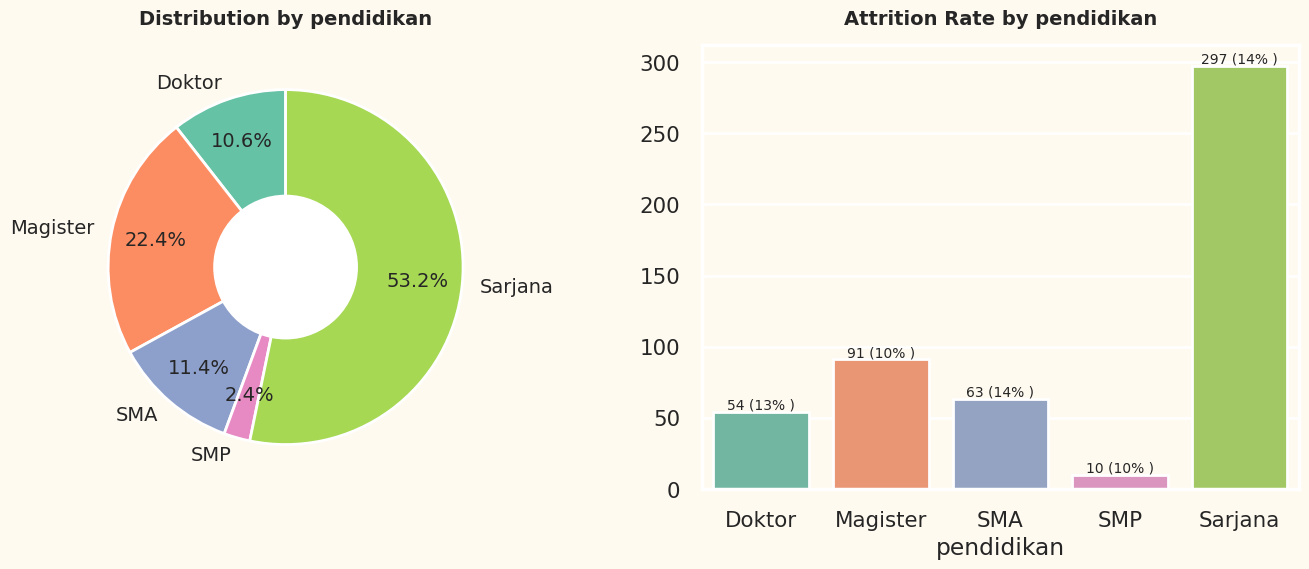

In [ ]:
# pendidikan
pie_bar_plot(df_train_prep, 'pendidikan','jumlah_promosi')

**What we found?**💡

* Mayoritas pelangganan berpendidikan sarjana
* Attrition (jumlah promosi) terbanyak ada pada sarjana



### status pernikahan

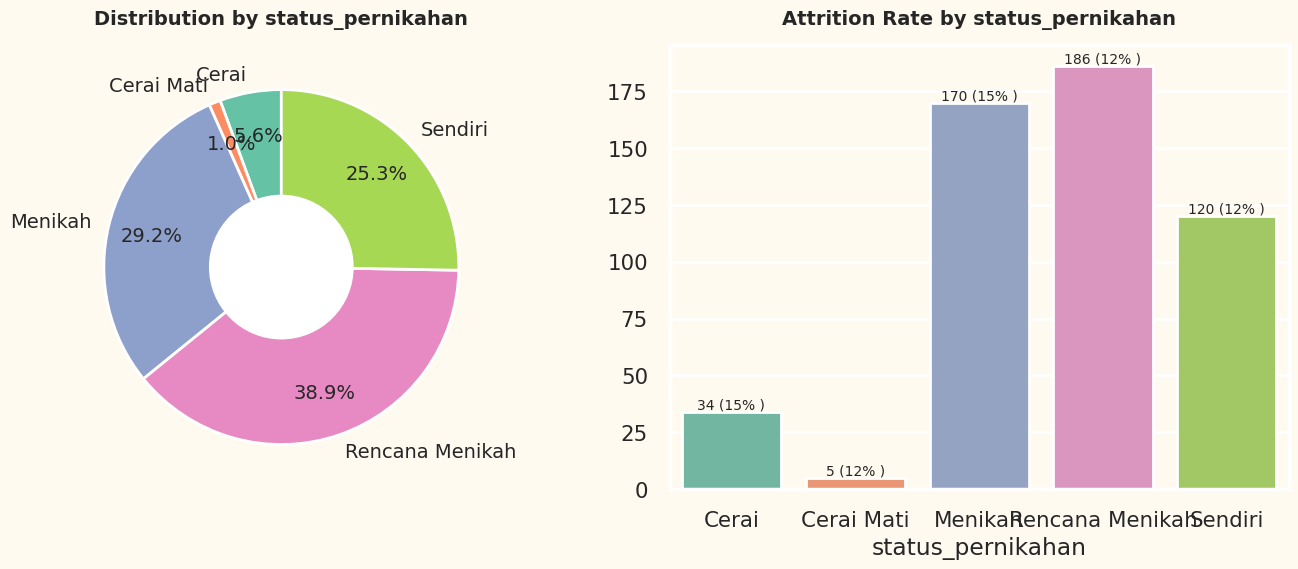

In [ ]:
# status pernikahan
pie_bar_plot(df_train_prep, 'status_pernikahan','jumlah_promosi')

**What we found?**💡

* pelanggan mayoritas berencana menikah
* Atrition (jumlah promosi) lebih banyak pada pelanggan yang berencana menikah



### tahun kelahiran 🔢

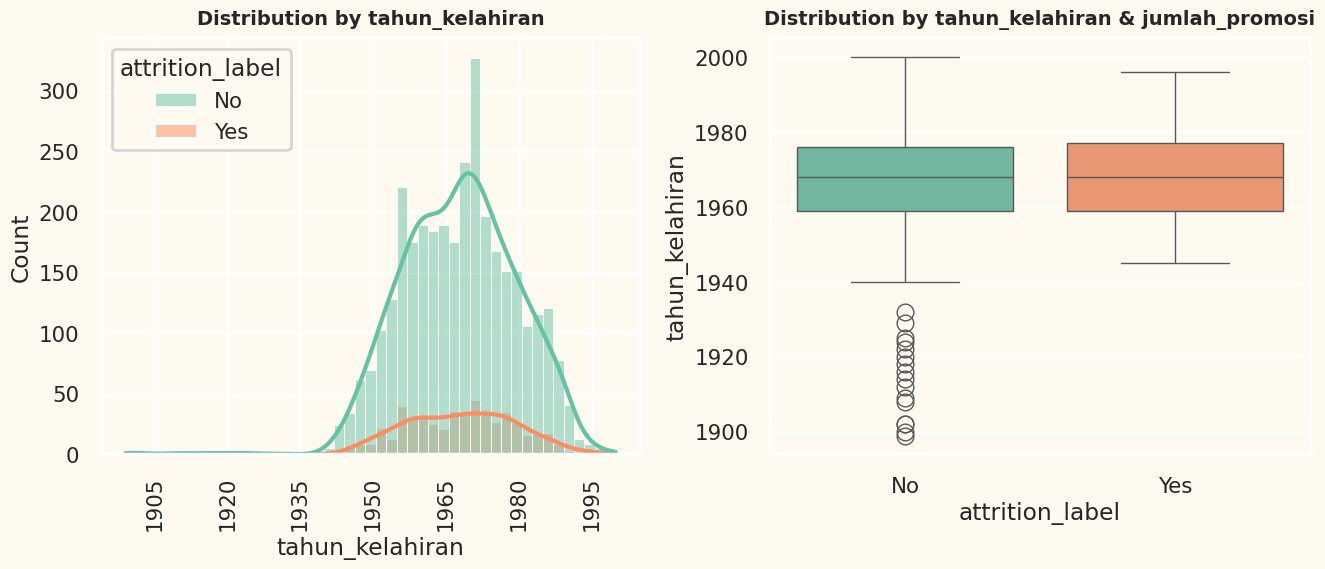

In [ ]:
# data ori
hist_with_hue(df_train, 'tahun_kelahiran', 'jumlah_promosi')

**What we found?**💡

* Dilihat dari tahun kelahiran pelangganan, lebih banyak promosi yes daripada no
* pelanggan mayoritas kelahiran tahun 1976



### terakhir belanja

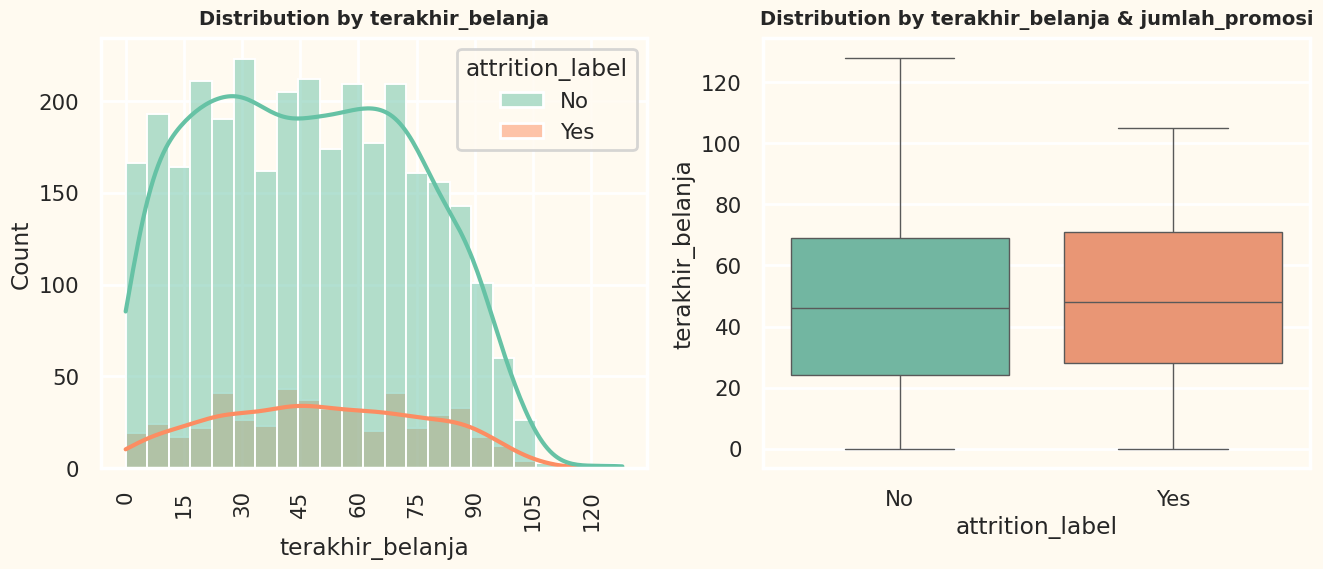

In [ ]:
# data ori
hist_with_hue(df_train, 'terakhir_belanja', 'jumlah_promosi')

**What we found?**💡

* Terakhir belanja memengaruhi jumlah promosi


### belanja buah

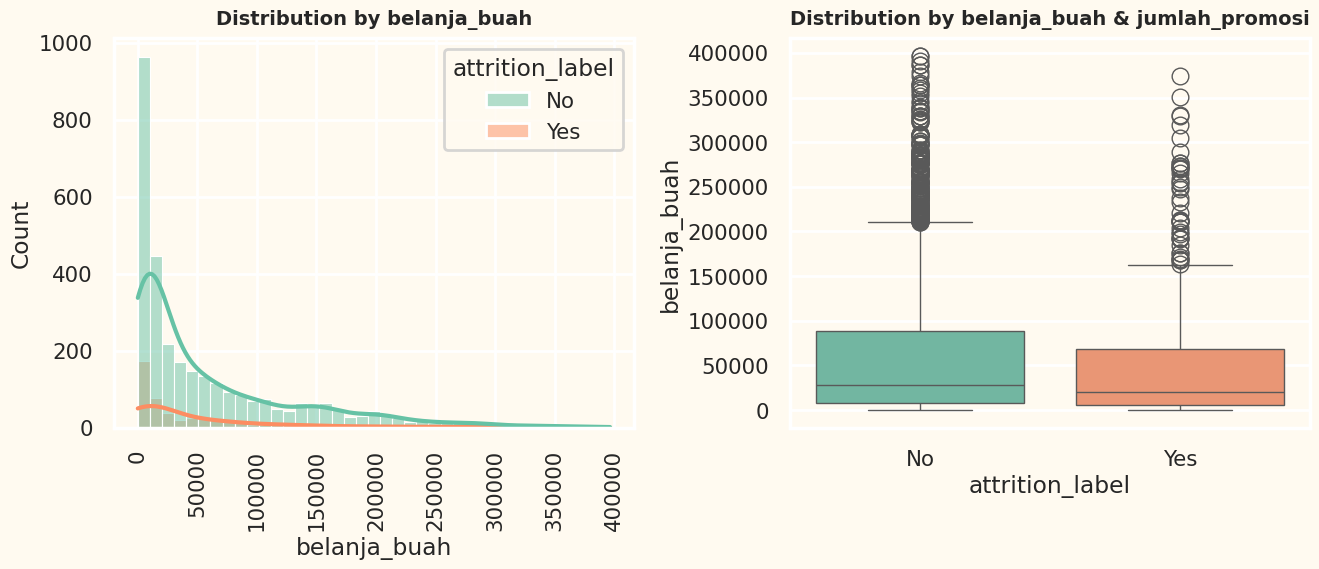

In [ ]:
# data ori
hist_with_hue(df_train,'belanja_buah','jumlah_promosi')

**What we found?**💡

* Belanja buah sedikit mempengaruhi jumlah promosi


### belanja daging

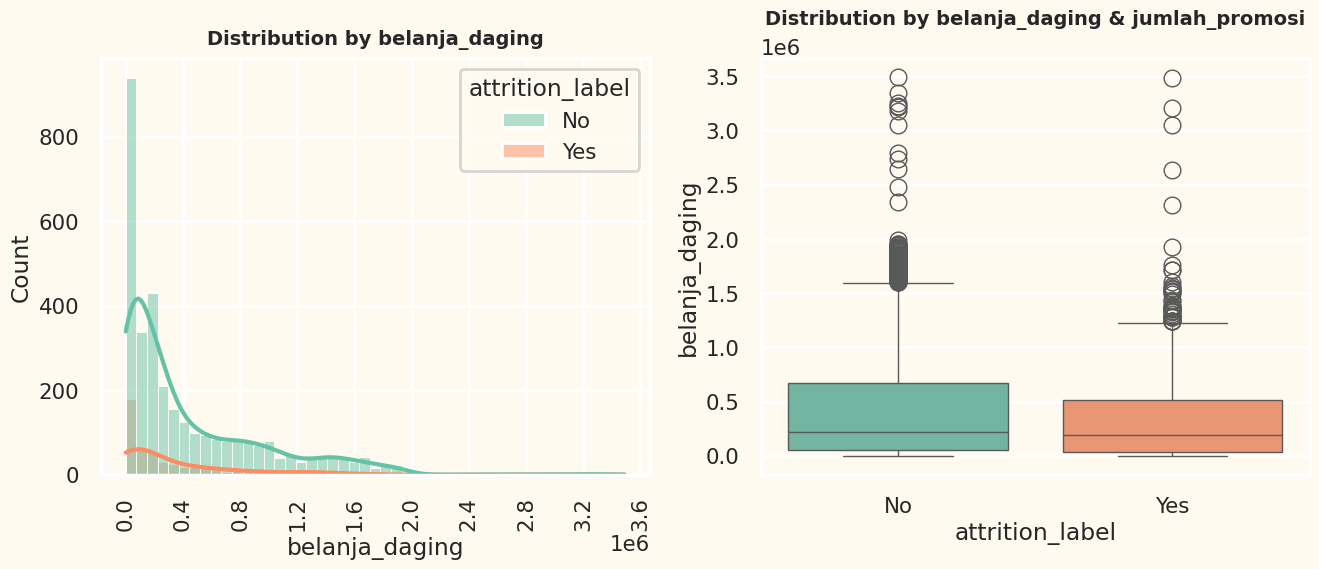

In [ ]:
# data prep
hist_with_hue(df_train_prep,'belanja_daging','jumlah_promosi')

**What we found?**💡

* Belanja daging sedikit mempengaruhi jumlah promosi



### belanja ikan

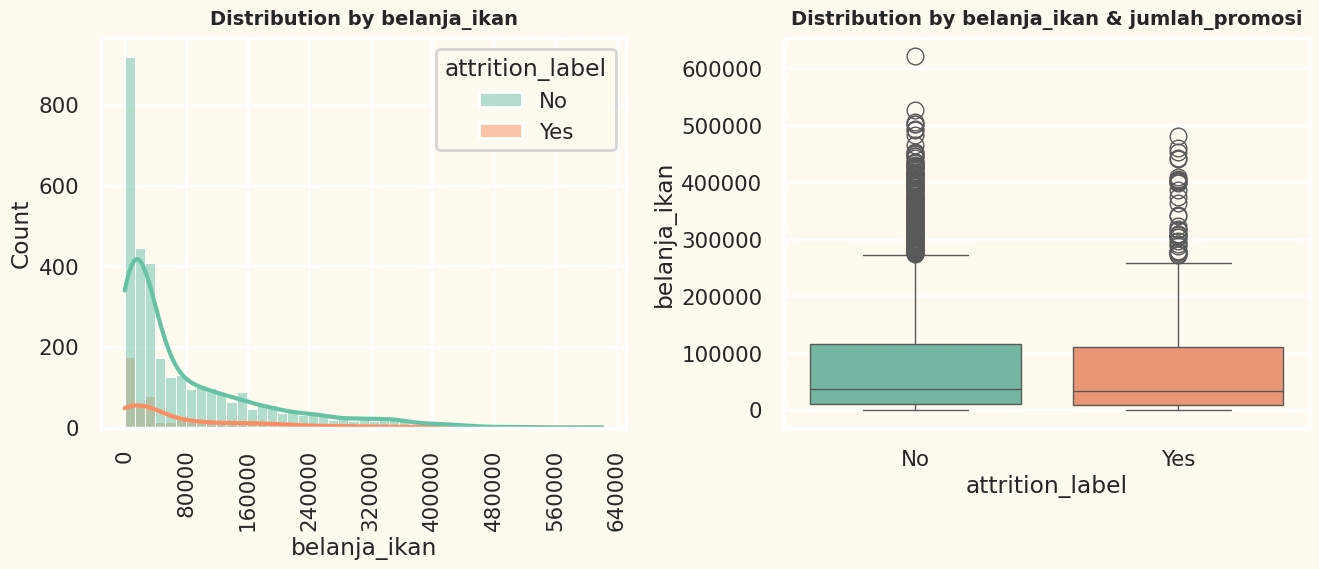

In [ ]:
hist_with_hue(df_train_prep,'belanja_ikan','jumlah_promosi')

**What we found?**💡
* Belanja ikan sedikit mempengaruhi jumlah promosi

### belanja kue

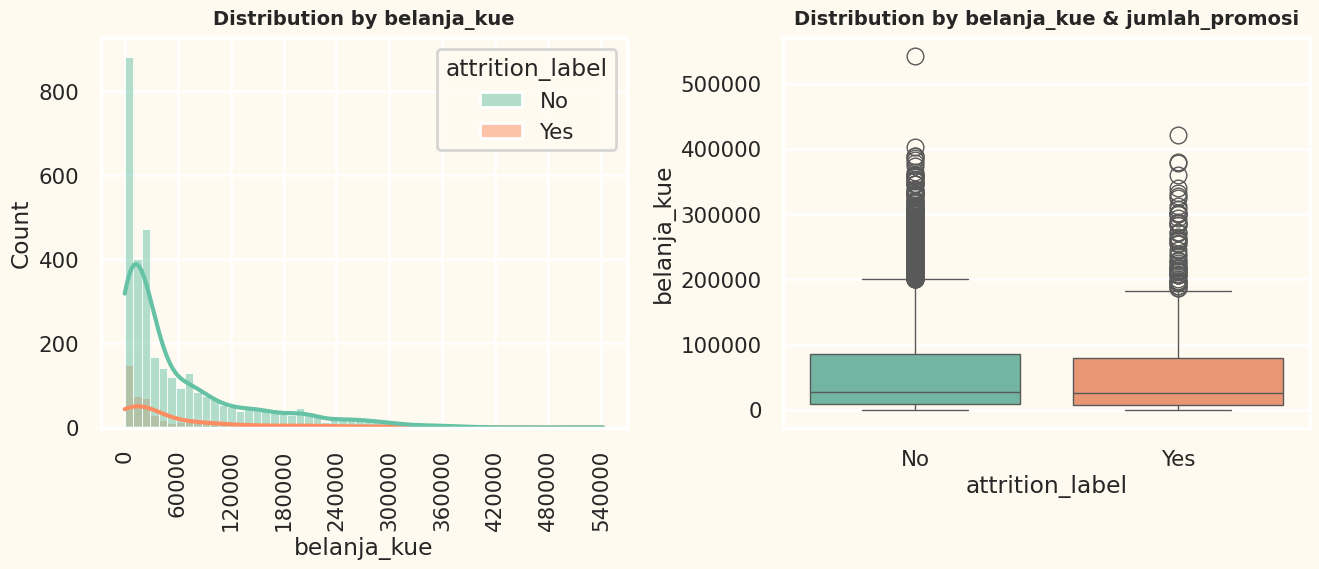

In [ ]:
hist_with_hue(df_train_prep,'belanja_kue','jumlah_promosi')

**What we found?**💡

* Belanja kue sedikit mempengaruhi jumlah promosi



### jumlah anak balita

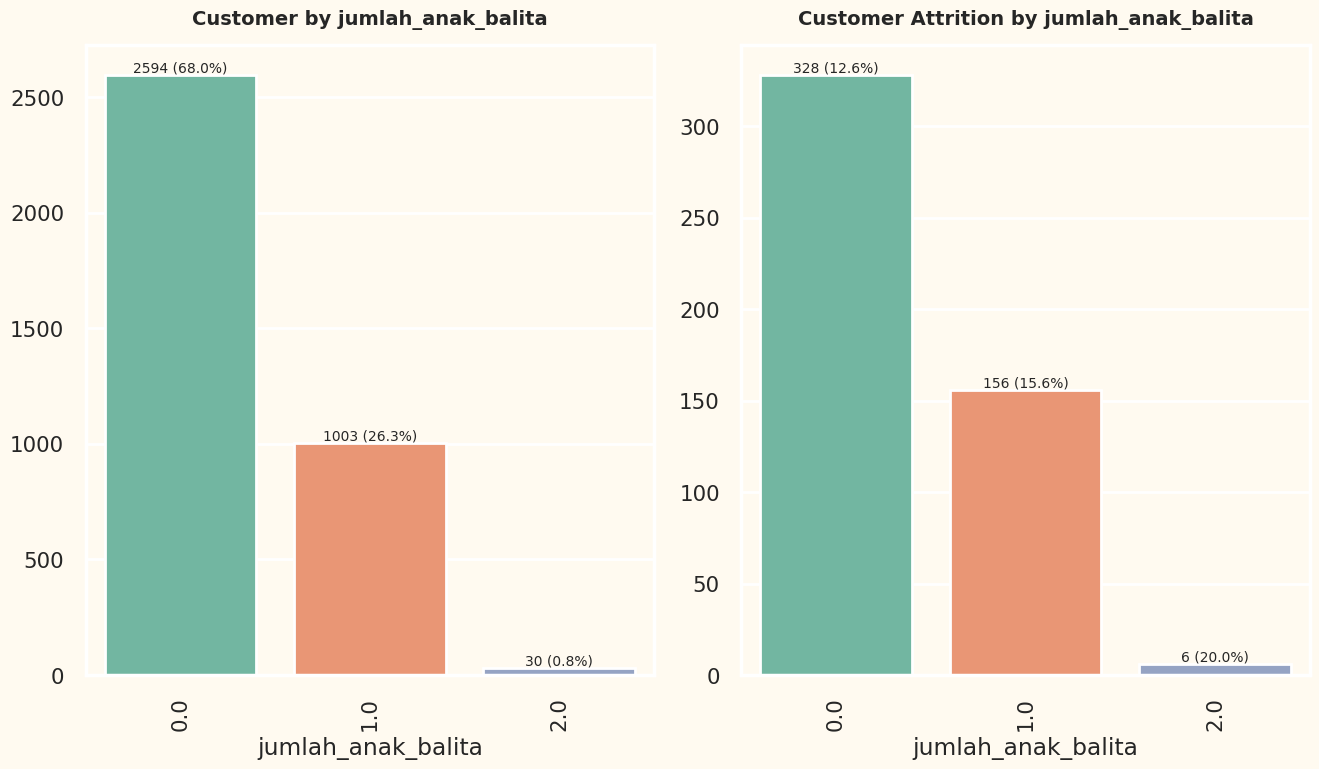

In [ ]:
count_percent_plot(df_train,'jumlah_anak_balita','jumlah_promosi')

**What we found?**💡
* Mayoritas pelangganan tidak memiliki anak balita


### jumlah anak remaja

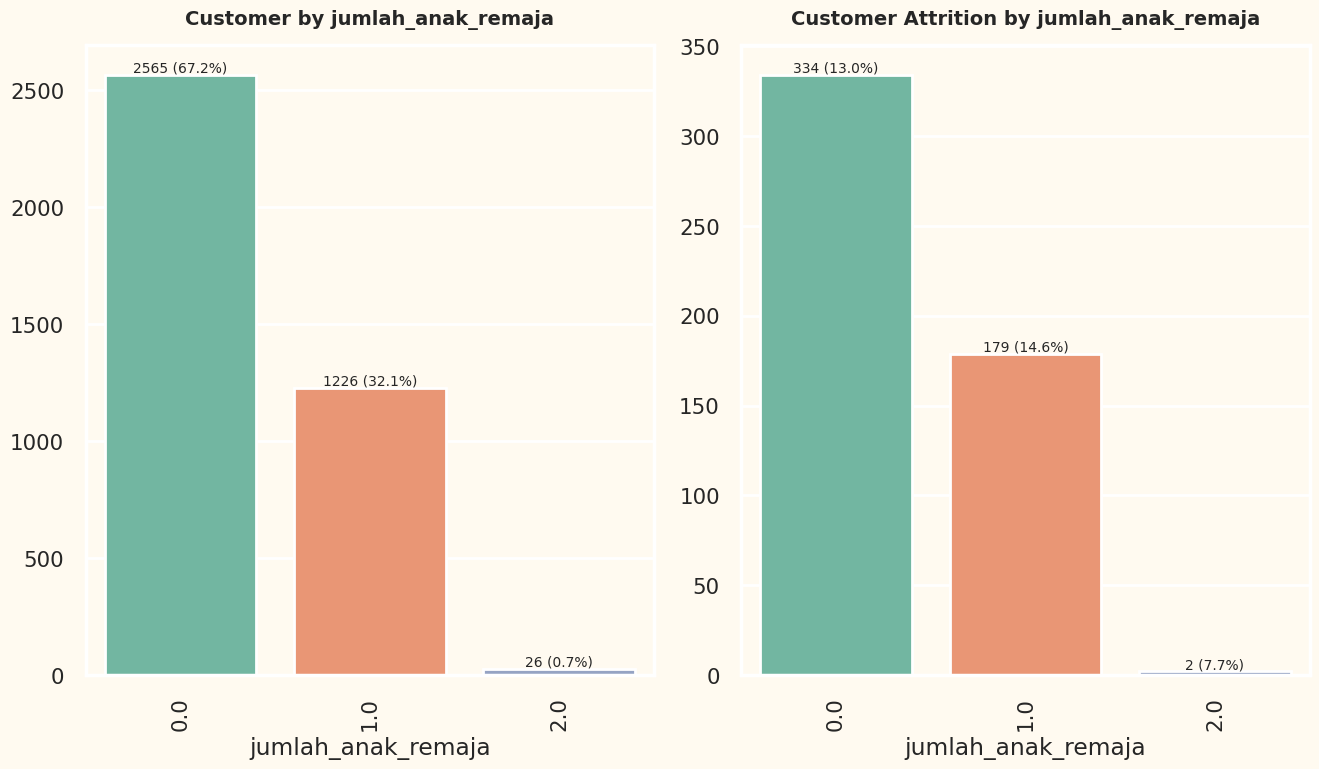

In [ ]:
count_percent_plot(df_train_prep,'jumlah_anak_remaja','jumlah_promosi')

**What we found?**💡

* Mayoritas pelanggan tidak memiliki anak remaja



### pembelian diskon

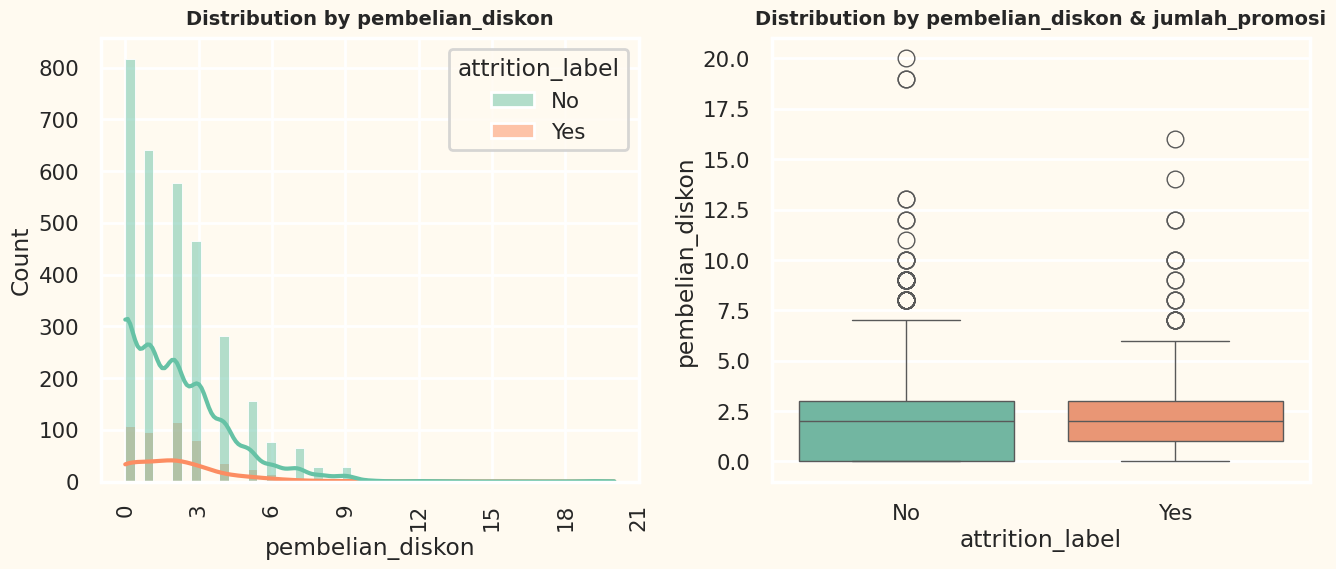

In [ ]:

hist_with_hue(df_train,'pembelian_diskon','jumlah_promosi')

**What we found?**💡
* pembelian diskon sedikit cenderung no

### pembelian web

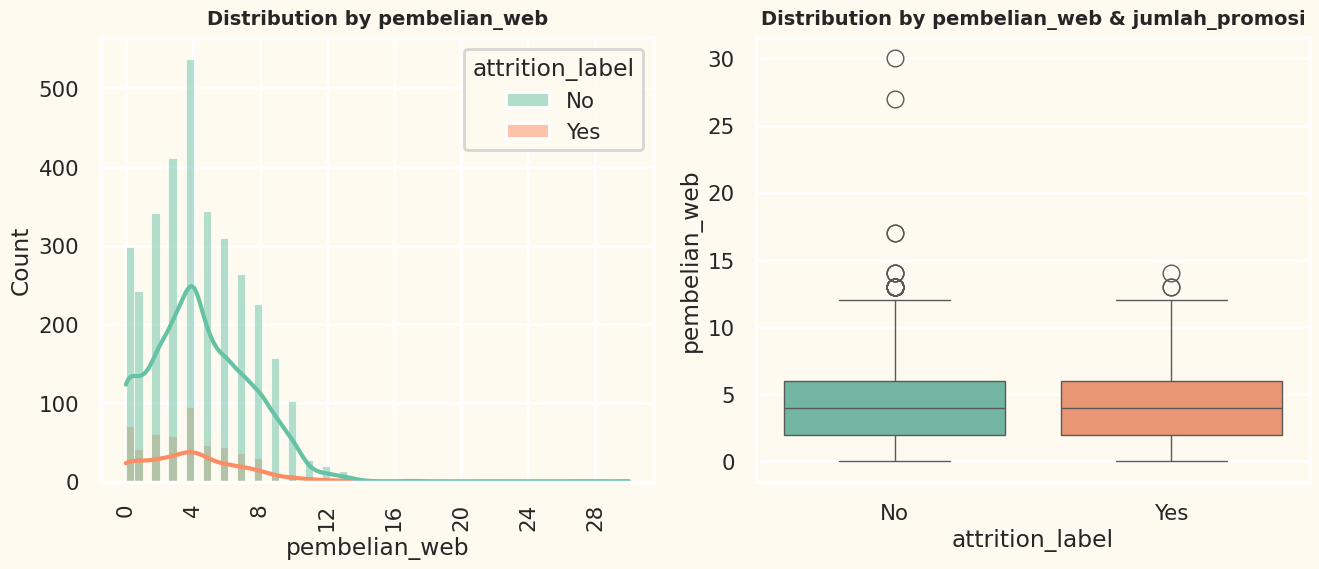

In [ ]:
hist_with_hue(df_train_prep,'pembelian_web','jumlah_promosi')

**What we found?**💡

* Pembelian web banyak cenderung no



### pembelian toko

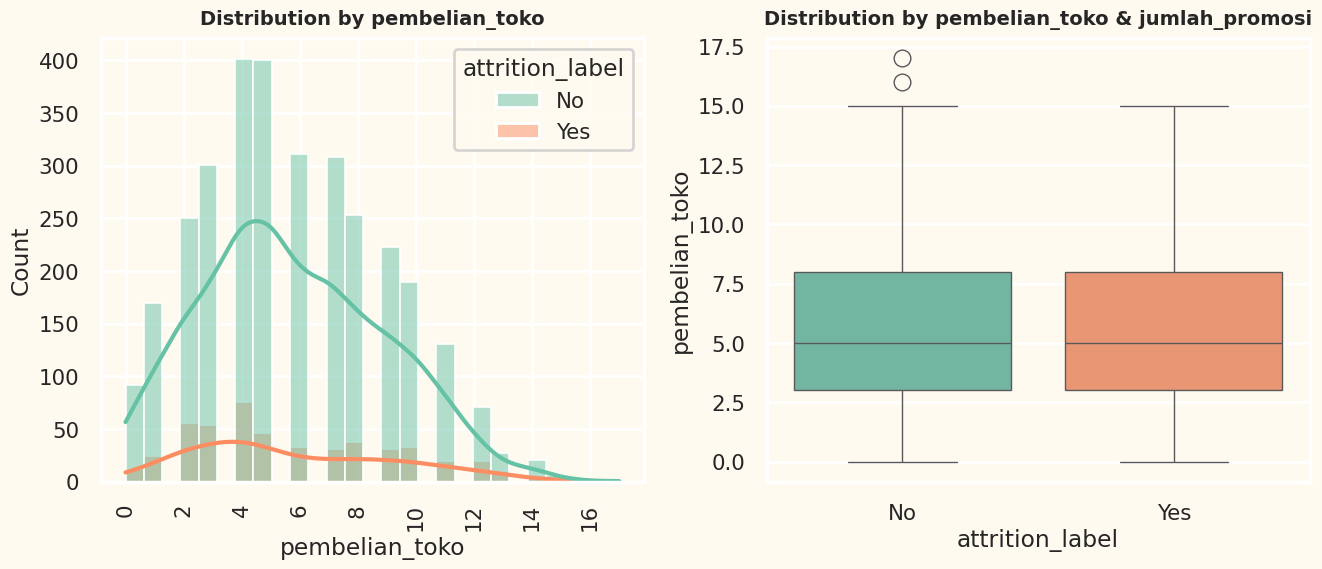

In [ ]:
hist_with_hue(df_train,'pembelian_toko','jumlah_promosi')

**What we found?**💡
* pelangganan yang membeli di toko cenderung tidak dapat promosi

### keluhan

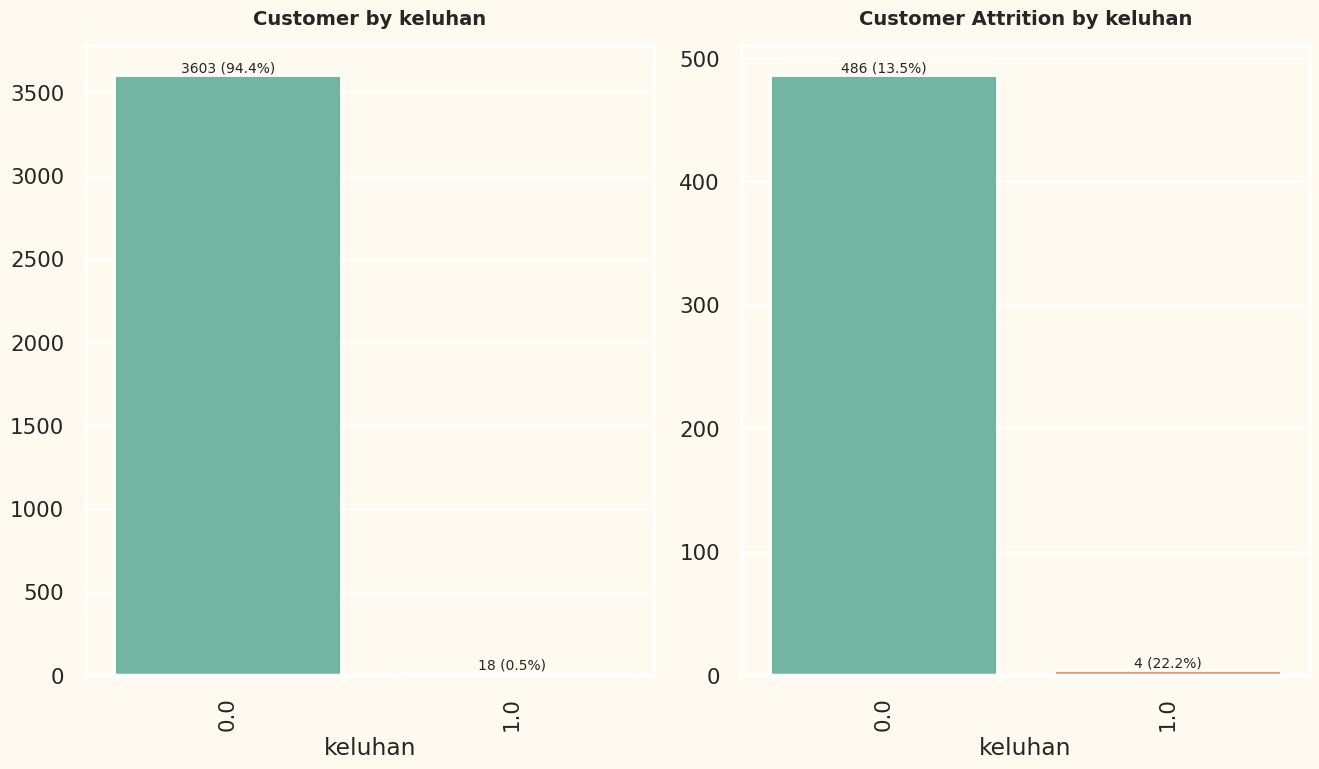

In [ ]:
count_percent_plot(df_train, 'keluhan', 'jumlah_promosi')

**What we found?**💡
* Mayoritas pelanggan tidak memberi keluhan

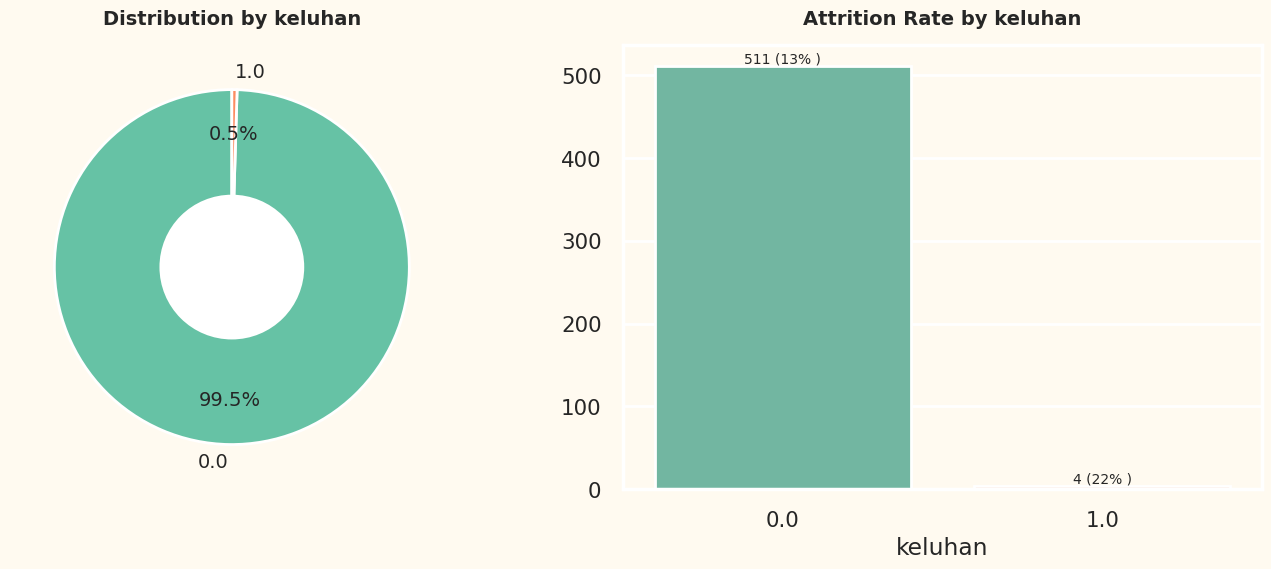

In [ ]:
# data prep
pie_bar_plot(df_train_prep, 'keluhan', 'jumlah_promosi')

**What we found?**💡
* Mayoritas pelangganan tidak memberi keluhan

In [ ]:
# droping the columns which we have created for analysis purpose
df_train_prep.drop(['attrition_label'],axis = 1, inplace=True)

**Why we do this**❓

Attrition label hanya kami gunakan untuk EDA, sehingga lebih baik didrop untuk analisis selanjutnya

# Feature Importance 📌

Kami melakukan uji ANOVA untuk menganalisis apakah kolom/fitur/variabel penting untuk jumlah_promosi

## num cols

In [ ]:
num_cols = df_train_prep.select_dtypes(np.number).columns

In [ ]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(df_train_prep[column],df_train_prep['jumlah_promosi'])

    f_scores[column] = f_score
    p_values[column] = p_value

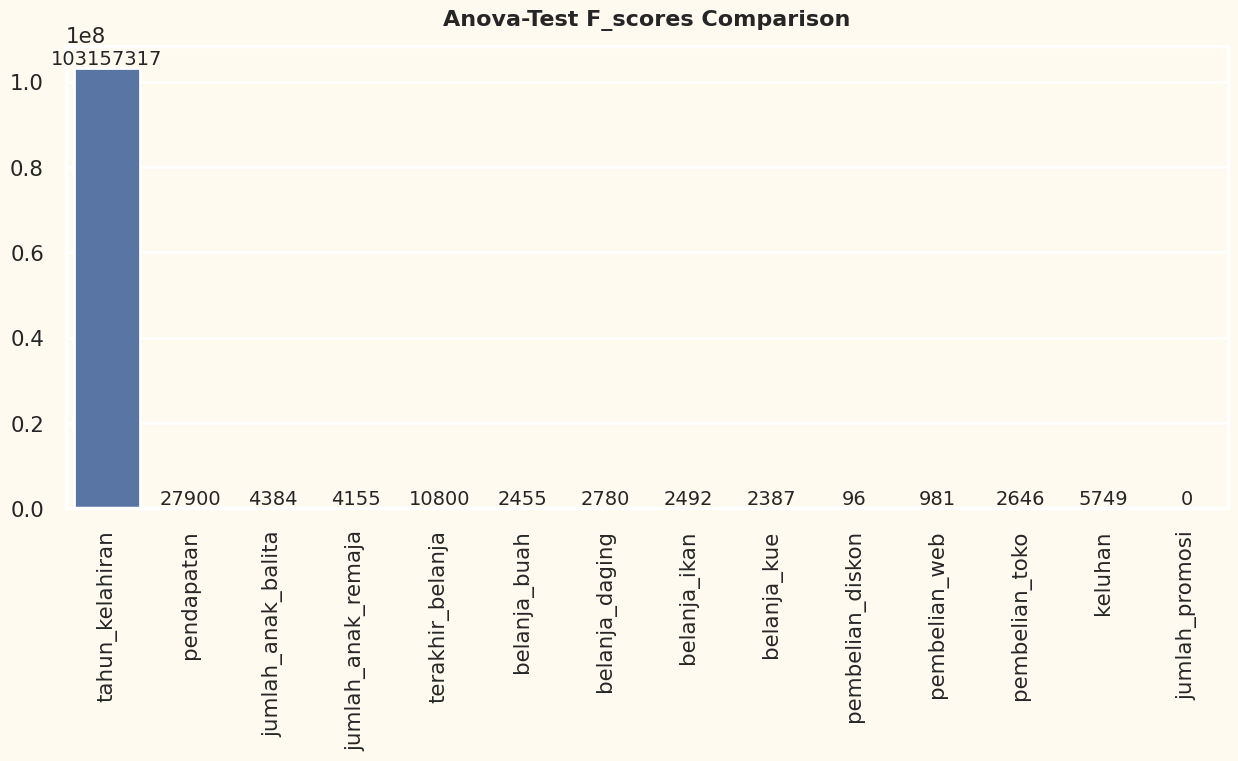

In [ ]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

In [ ]:
anova_data = pd.DataFrame({"Features":keys,"F_Score":values})
anova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
anova_data

,Features,F_Score,P_value
0,tahun_kelahiran,1.031573e+08,0.00000000000000000000
1,pendapatan,2.790057e+04,0.00000000000000000000
2,jumlah_anak_balita,4.384644e+03,0.00000000000000000000
3,jumlah_anak_remaja,4.155522e+03,0.00000000000000000000
4,terakhir_belanja,1.080055e+04,0.00000000000000000000
5,belanja_buah,2.455035e+03,0.00000000000000000000
6,belanja_daging,2.780299e+03,0.00000000000000000000
7,belanja_ikan,2.492719e+03,0.00000000000000000000
8,belanja_kue,2.387580e+03,0.00000000000000000000
9,pembelian_diskon,9.615177e+01,0.00000000000000000000


**What we found?**💡

p-value semua variabel numerik < 0.05 sehingga semua variabel numerik penting atau berpengaruh pada jumlah_promosi

## cat cols

In [ ]:
cat_cols = df_train_prep.select_dtypes(include="object").columns.tolist()

In [ ]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df_train_prep[col], df_train_prep['jumlah_promosi'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

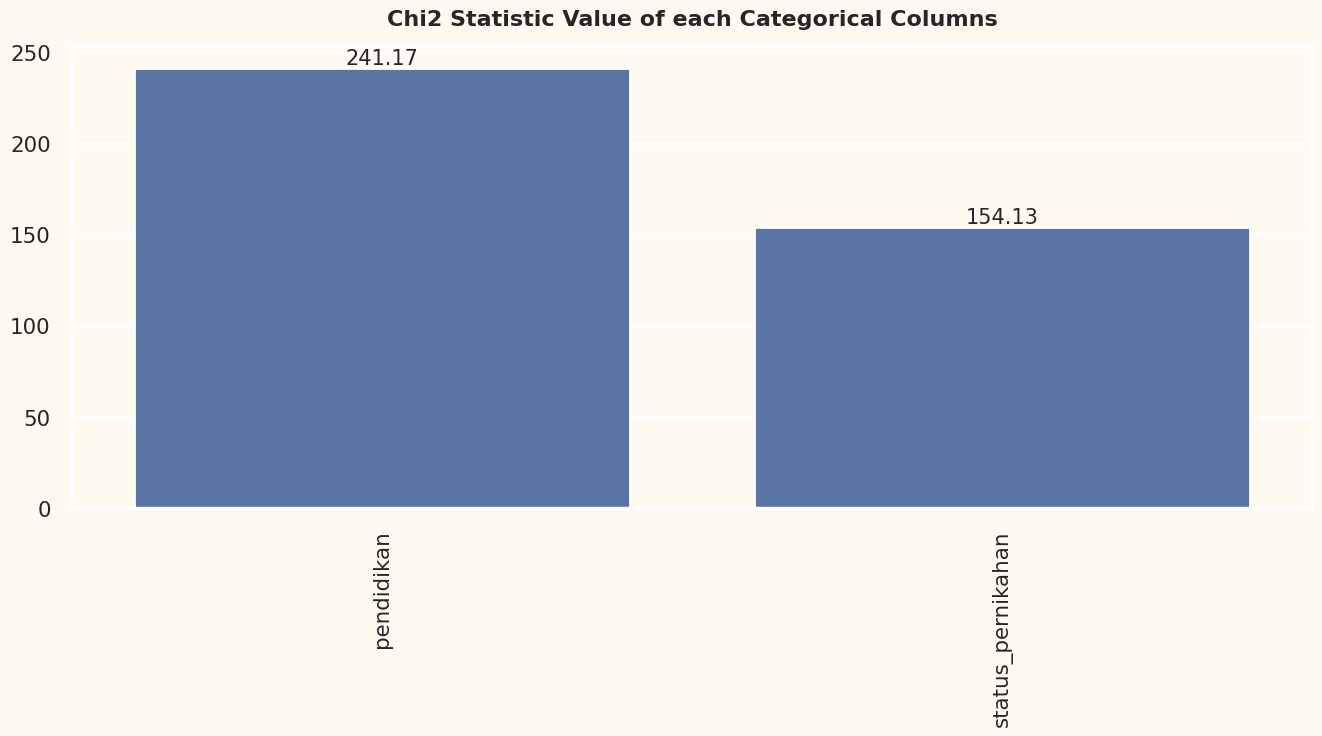

In [ ]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

In [ ]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

,Features,Chi_2 Statistic,P_value
0,pendidikan,241.170307,0.00000000000000000000
1,status_pernikahan,154.129384,0.00000000000000000001


**What we found?**💡

pvalue variabel pendidikan dan status_pernikahan < 0.05 sehingga kedua variabel penting untung jumlah_promosi

# Encoding 0️⃣1️⃣

## Pendidikan

In [ ]:
df_train_prep["pendidikan"] = df_train_prep["pendidikan"].replace({"SMP":1 ,"SMA":2, "Sarjana":3,"Magister":4, "Doktor":5})
df_test_prep["pendidikan"] = df_test_prep["pendidikan"].replace({"SMP":1 ,"SMA":2, "Sarjana":3,"Magister":4, "Doktor":5})

## Status Pernikahan

In [ ]:
df_train_prep["status_pernikahan"] = df_train_prep["status_pernikahan"].replace({"Sendiri":1 ,"Rencana Menikah":2, "Menikah":3,"Cerai":4, "Cerai Mati":5})
df_test_prep["status_pernikahan"] = df_test_prep["status_pernikahan"].replace({"Sendiri":1 ,"Rencana Menikah":2, "Menikah":3,"Cerai":4, "Cerai Mati":5})

In [ ]:
df_train_prep

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
0,1979,3,2,115621394.0,0.0,1.0,47.0,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2
1,1950,3,2,84063000.0,0.0,0.0,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,0
2,1966,3,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,1
3,1961,4,2,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,4
4,1970,3,2,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,4,3,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,5
3813,1947,5,2,109306000.0,0.0,1.0,44.0,0.0,50575.0,36054.5,0.0,3.0,6.0,3.0,0.0,1
3814,1974,4,3,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,0
3815,1957,2,2,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,27795.0,4.0,5.0,4.0,0.0,0


# Correlation Matrix ⛓

<Axes: title={'center': 'Correlation Plot'}>

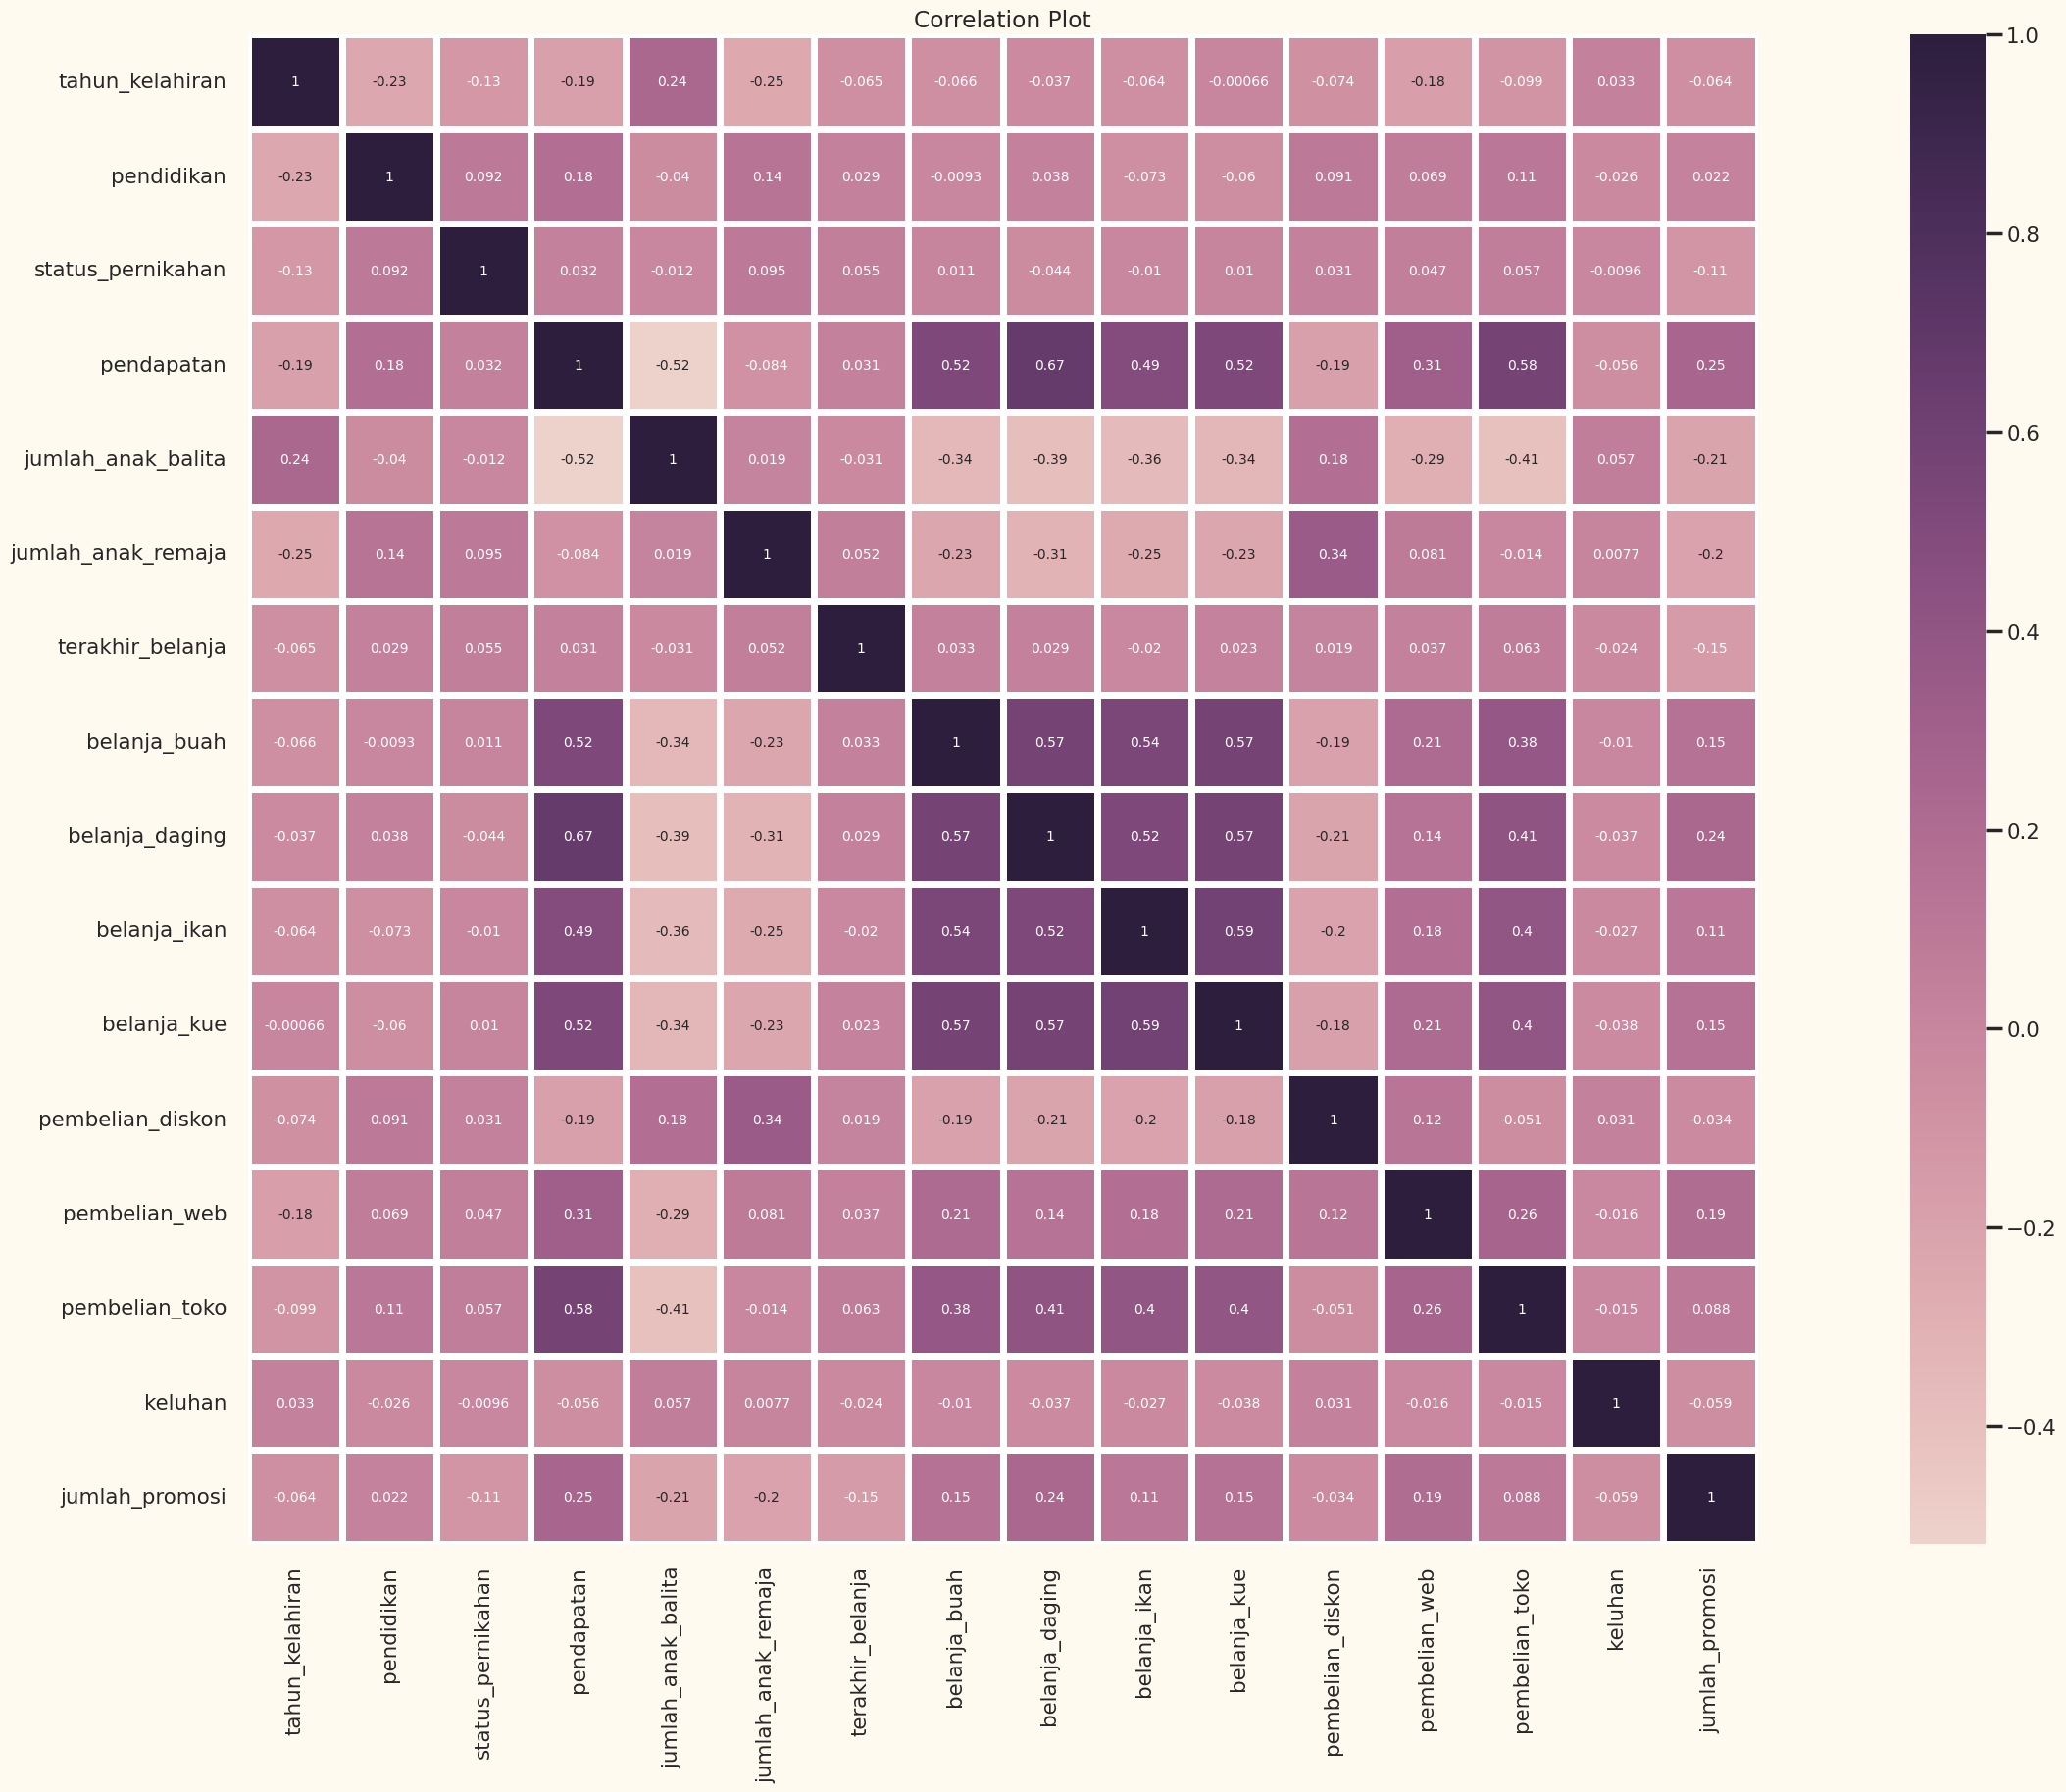

In [ ]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df_train_prep.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10}, cmap=sns.cubehelix_palette(as_cmap=True))

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_train_prep.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:


**What we found?**💡

tidak ada variabel/fitur dengan korelasi tinggi

# Imbalance ⚖️

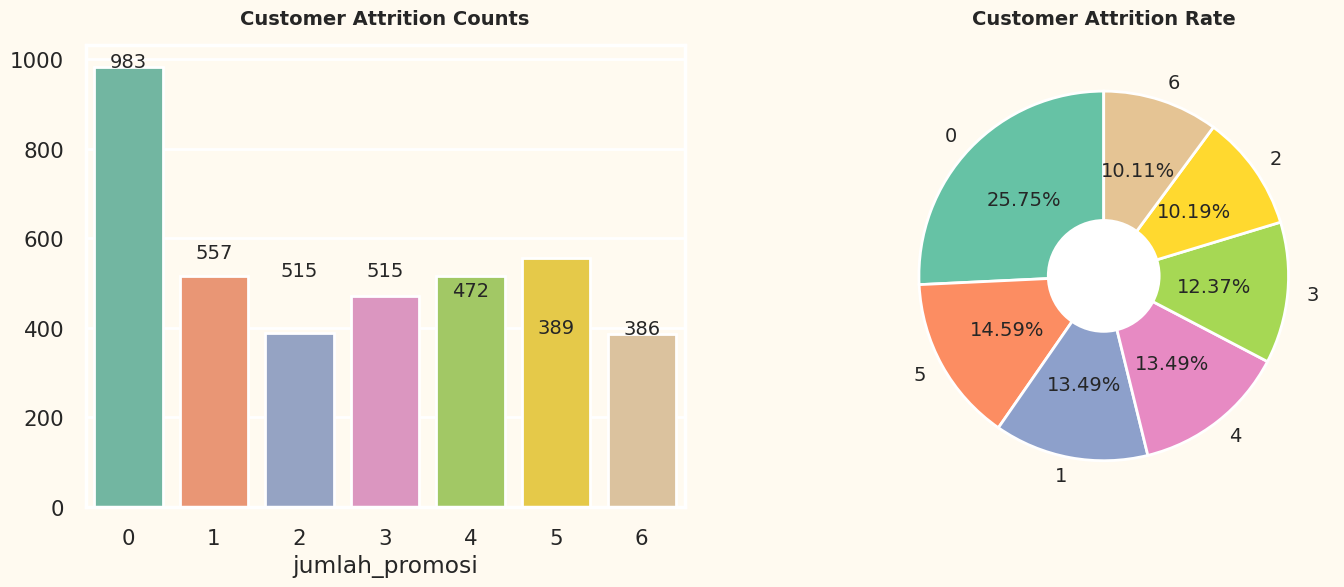

In [ ]:
#Visualization to show Customer Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_counts = df_train_prep["jumlah_promosi"].value_counts()
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Set2')
plt.title("Customer Attrition Counts", fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_counts.values):
    plt.text(i, v, v, ha="center", fontsize=14)

#Visualization to show Customer Attrition in Percentage.
plt.subplot(1,2,2)
attrition_rate = df_train_prep["jumlah_promosi"].value_counts(normalize=True) * 100
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=attrition_rate.index, autopct="%.2f%%", textprops={"size":14},
        colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Customer Attrition Rate", fontweight="black", size=14, pad=15)
plt.show()


**What we found?**💡

Data tidak balance sehingga harus dilakukan balancing

# Independent vs Dependent

In [ ]:
x = df_train_prep.drop(['jumlah_promosi'], axis=1) # Independent variabel
y = df_train_prep[['jumlah_promosi']] # Dependen variabel

In [ ]:
x

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
0,1979,3,2,115621394.0,0.0,1.0,47.0,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0
1,1950,3,2,84063000.0,0.0,0.0,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0
2,1966,3,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0
3,1961,4,2,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0
4,1970,3,2,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,4,3,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0
3813,1947,5,2,109306000.0,0.0,1.0,44.0,0.0,50575.0,36054.5,0.0,3.0,6.0,3.0,0.0
3814,1974,4,3,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0
3815,1957,2,2,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,27795.0,4.0,5.0,4.0,0.0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tahun_kelahiran     3817 non-null   int64  
 1   pendidikan          3817 non-null   int64  
 2   status_pernikahan   3817 non-null   int64  
 3   pendapatan          3817 non-null   float64
 4   jumlah_anak_balita  3817 non-null   float64
 5   jumlah_anak_remaja  3817 non-null   float64
 6   terakhir_belanja    3817 non-null   float64
 7   belanja_buah        3817 non-null   float64
 8   belanja_daging      3817 non-null   float64
 9   belanja_ikan        3817 non-null   float64
 10  belanja_kue         3817 non-null   float64
 11  pembelian_diskon    3817 non-null   float64
 12  pembelian_web       3817 non-null   float64
 13  pembelian_toko      3817 non-null   float64
 14  keluhan             3817 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 447.4 KB


In [ ]:
# Balancing Imbalanced Data
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smote" , y.value_counts())
print()
print("After Smote" , y_smote.value_counts())

Before Smote jumlah_promosi
0                 983
5                 557
1                 515
4                 515
3                 472
2                 389
6                 386
Name: count, dtype: int64

After Smote jumlah_promosi
0                 983
1                 983
2                 983
3                 983
4                 983
5                 983
6                 983
Name: count, dtype: int64


# Feature Engineering ⚙️

In [ ]:
# Fungsi untuk mengkategorikan pendapatan
def categorize_income(income):
    if income <= 83359370.75:
        return 1
    elif 83359370.75 < income <= 117732079.0:
        return 2
    elif 117732079.0 < income <= 148781700.0:
        return 3
    elif 148781700.0 < income <= 1305740000.0:
        return 4
    else:
        return 5

In [ ]:
from datetime import datetime
import pandas as pd

def newfeatures(df):
    # Usia Pelanggan
    df['usia'] = datetime.now().year - df['tahun_kelahiran']

    # Total Belanja
    df['total_belanja'] = df[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].sum(axis=1)

    # Pengeluaran
    df['pengeluaran'] = df['pendapatan'] - df['total_belanja']

    # Jumlah Anak
    #df['jumlah_anak'] = df[['jumlah_anak_balita', 'jumlah_anak_remaja']].sum(axis=1)

    # Kategori Pendapatan
    df['kategori_pendapatan'] = df['pendapatan'].apply(categorize_income)

    # Drop variabel tahun_kelahiran
    df.drop('tahun_kelahiran', axis=1, inplace=True)
    #df.drop('jumlah_anak_balita', axis=1, inplace=True)
    #df.drop('jumlah_anak_remaja', axis=1, inplace=True)
    #df.drop('keluhan', axis=1, inplace=True)
    return df

**Why we do this**❓

kami menambah beberapa variabel untuk memperluas informasi yang didapat

In [ ]:
newfeatures(x_smote)
newfeatures(df_test_prep)

,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,usia,total_belanja,pengeluaran,kategori_pendapatan
0,3,2,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,67,962173.0,119697978.0,3
1,5,3,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,56,493573.0,163058248.0,4
2,2,3,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,56,86989.0,29770011.0,1
3,5,3,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,53,140678.0,117808420.0,3
4,3,2,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,50,2103642.0,162657492.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,4,1,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,1.0,40,60690.0,66259310.0,1
3814,3,3,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,52,1319477.0,158332469.0,4
3815,4,2,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.0,10540.0,2.0,0.0,1.0,0.0,56,77725.0,83981198.0,2
3816,3,2,106301000.0,0.0,1.0,74.0,16184.0,78897.0,40025.5,0.0,3.0,5.0,3.0,0.0,58,135106.5,106165893.5,2


# Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = RobustScaler()
minmax = MinMaxScaler()

In [ ]:
x_smote_scaled = x_smote
df_test_scaled = df_test_prep

In [ ]:
x_smote.head()

,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,usia,total_belanja,pengeluaran,kategori_pendapatan
0,3,2,115621394.0,0.0,1.0,47.0,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,45,382347.0,115239047.0,2
1,3,2,84063000.0,0.0,0.0,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,74,151725.0,83911275.0,2
2,3,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,58,624985.0,126907579.0,3
3,4,2,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,63,1973840.0,163605780.0,4
4,3,2,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,54,476553.0,117226606.0,2


In [ ]:
# Scaled with minmax
columns_to_minmax_scale = ['pendidikan','status_pernikahan','terakhir_belanja','jumlah_anak_remaja','kategori_pendapatan']
x_smote_scaled[columns_to_minmax_scale] = minmax.fit_transform(x_smote_scaled[columns_to_minmax_scale])

In [ ]:
# Scaled with Robust
columns_to_RobustScaler = ['pendapatan','jumlah_anak_balita','belanja_buah','belanja_daging','belanja_ikan','belanja_kue','pembelian_diskon','pembelian_web','pembelian_toko','total_belanja','usia','pengeluaran']
x_smote_scaled[columns_to_RobustScaler] = scaler.fit_transform(x_smote_scaled[columns_to_RobustScaler])

**Why we do this**❓

Kami melakukan:
* minmax scale pada` ['pendidikan','status_pernikahan','terakhir_belanja','jumlah_anak','kategori_pendapatan']` karena tidak terdapat outlier dan untuk memudahkan analisis
* robust scale pada` ['pendapatan','belanja_buah','belanja_daging','belanja_ikan','belanja_kue','pembelian_diskon','pembelian_web','pembelian_toko','total_belanja','usia','pengeluaran','pendapatan_per_anak']` karena variabel ini terdapat banyak outlier, sehingga tidak dapat digunakan minmax scale yang rentan terhadap outlier

In [ ]:
df_test_scaled[columns_to_minmax_scale] = minmax.transform(df_test_scaled[columns_to_minmax_scale])
df_test_scaled[columns_to_RobustScaler] = scaler.transform(df_test_scaled[columns_to_RobustScaler])

# Baseline Model Build

In [ ]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []

# Model Building - Scaled Data

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict

def model_prediction(model, x, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)
        y_test_prob = model.predict_proba(x_test)[:, 1]

        a = accuracy_score(y_train, x_train_pred) * 100
        b = accuracy_score(y_test, x_test_pred) * 100
        c = precision_score(y_test, x_test_pred)
        d = recall_score(y_test, x_test_pred)
        e = roc_auc_score(y_test, y_test_prob)
        f = f1_score(y_test, x_test_pred)

        training_score.append(a)
        testing_score.append(b)
        precission.append(c)
        recall.append(d)
        Roc_Auc_score.append(e)
        f1_score_.append(f)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Accuracy_Score of {model} model on Training Data is:", np.mean(training_score))
    print(f"Mean Accuracy_Score of {model} model on Testing Data is:", np.mean(testing_score))
    print(f"Mean Precision Score of {model} model is:", np.mean(precission))
    print(f"Mean Recall Score of {model} model is:", np.mean(recall))
    print(f"Mean ROC_AUC Score of {model} model is:", np.mean(Roc_Auc_score))
    print(f"Mean f1 Score of {model} model is:", np.mean(f1_score_))

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    y_pred_all = cross_val_predict(model, x, y, cv=skf)
    print(classification_report(y, y_pred_all))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y, y_pred_all)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()

In [ ]:
y_smote_array = np.array(y_smote)

# Model Building - Unscaled Data

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def model_prediction(model, x, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    macro_f_scores = []

    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        x_test_pred = model.predict(x_test)
        y_test_prob = model.predict_proba(x_test)[:, 1]

        macro_f_scores.append(f1_score(y_test, x_test_pred, average='macro'))

    print("\n------------------------------------------------------------------------")
    print(f"Mean Macro F-Score of {model} model is:", np.mean(macro_f_scores))


## Extra Trees

In [ ]:
model_prediction(ExtraTreesClassifier(), x_smote, y_smote, n_splits=5, random_state=42)


------------------------------------------------------------------------
Mean Macro F-Score of ExtraTreesClassifier() model is: 0.8973003399006609


## Random Forest

In [ ]:
model_prediction(RandomForestClassifier(), x_smote, y_smote, n_splits=5, random_state=42)


------------------------------------------------------------------------
Mean Macro F-Score of RandomForestClassifier() model is: 0.8701265647846415


## All Models

In [ ]:
def model_macro_f_score(model, x_data, y_data, n_splits=5):
    # Use cross_val_predict to get predictions
    predictions = cross_val_predict(model, x_data, y_data, cv=n_splits)
    # Calculate Macro F-Score
    macro_f_score = f1_score(y_data, predictions, average='macro')
    return macro_f_score

# Instantiate different classifiers
et_model = ExtraTreesClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# List of models
models = [et_model, rf_model]
model_names = ['Extra Trees', 'Random Forest']

# Iterate over models and calculate Macro F-Score
for model, name in zip(models, model_names):
    macro_f_score = model_macro_f_score(model, x_smote, y_smote)
    print(f"{name} Macro F-Score:", macro_f_score)


Extra Trees Macro F-Score: 0.8985206621468118
Random Forest Macro F-Score: 0.8738728284653249


# Hypertuning Selected Models

## Extra Trees

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

def model_prediction(model, x_data, y_data, metric='accuracy', n_splits=5):
    # Perform cross-validation
    scores = cross_val_score(model, x_data, y_data, cv=n_splits, scoring=metric)
    return scores

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid, cv=5)
grid_search.fit(x_smote, y_smote)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the model_prediction function with the best ExtraTreesClassifier
best_et_model = grid_search.best_estimator_
et_predictions = cross_val_predict(best_et_model, x_smote, y_smote, cv=5)

# Calculate Macro F-Score
macro_f_score = f1_score(y_smote, et_predictions, average='macro')

# Print the Macro F-Score
print("Macro F-Score:", macro_f_score)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9043780927530358
Macro F-Score: 0.9033356848747797


🎊🎉**WELL DONE**🎊🎉


---









